In [86]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

import pandas as pd #loading data in table form


In [87]:
url = "https://archive.ics.uci.edu/static/public/42/data.csv"
dataset = pd.read_csv(url)

In [88]:
dataset

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [89]:

print(dataset["Type_of_glass"].unique())
class_mapping = {1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5}
dataset["Type_of_glass"].replace(class_mapping, inplace=True)
print(dataset["Type_of_glass"].unique())

[1 2 3 5 6 7]
[0 1 2 3 4 5]


In [90]:
X = dataset.drop(columns=['Id_number','Type_of_glass'])
Y = dataset['Type_of_glass']
print(X.shape)
print(Y.shape)

(214, 9)
(214,)


In [91]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [92]:
print(np.size(X_train))
print(np.size(X_test))

1341
585


# One-hot encoding

In [93]:
y_train_c=keras.utils.to_categorical(y_train, num_classes=6)
y_test_c=keras.utils.to_categorical(y_test, num_classes=6)
print("Shape of y_train",y_train_c.shape)
print("Shape of y_test",y_test_c.shape)
print(y_train_c.dtype)

Shape of y_train (149, 6)
Shape of y_test (65, 6)
float32


In [107]:
model = keras.Sequential(
    [
        layers.Dense(160, input_dim = 9, activation="relu"),
        layers.Dense(150, activation="relu"),
        layers.Dense(140, activation="relu"),
        layers.Dense(130, activation="relu"),
        layers.Dense(120, activation="relu"),
        layers.Dense(6, activation="softmax"),
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 160)               1600      
                                                                 
 dense_81 (Dense)            (None, 150)               24150     
                                                                 
 dense_82 (Dense)            (None, 140)               21140     
                                                                 
 dense_83 (Dense)            (None, 130)               18330     
                                                                 
 dense_84 (Dense)            (None, 120)               15720     
                                                                 
 dense_85 (Dense)            (None, 6)                 726       
                                                                 
Total params: 81666 (319.01 KB)
Trainable params: 816

In [112]:
history = model.fit(X_train, y_train_c, validation_split=0.30, epochs = 100, batch_size= 20, verbose = 1)

Epoch 1/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.7212 - val_loss: 1.4104 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7361 - accuracy: 0.7019 - val_loss: 1.2265 - val_accuracy: 0.6222
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8947 - accuracy: 0.5962 - val_loss: 1.2953 - val_accuracy: 0.5111
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7520 - accuracy: 0.6250 - val_loss: 1.1791 - val_accuracy: 0.5111
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7937 - accuracy: 0.6346 - val_loss: 1.2028 - val_accuracy: 0.5111
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.6635 - val_loss: 1.2381 - val_accuracy: 0.4889
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.6731 - val_loss: 1.0789 - val_accuracy: 0.5333
Epoch 8/100
6/6 [==========

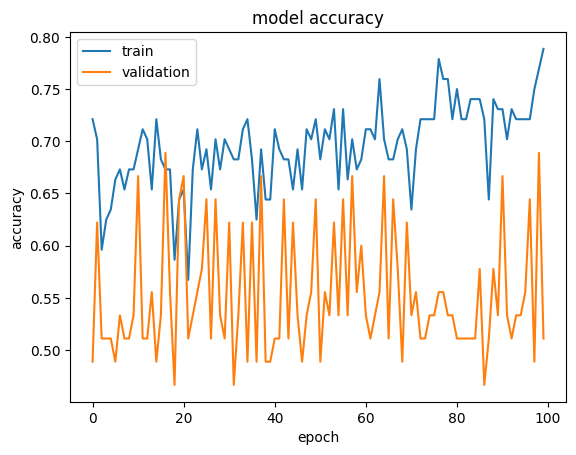

In [113]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

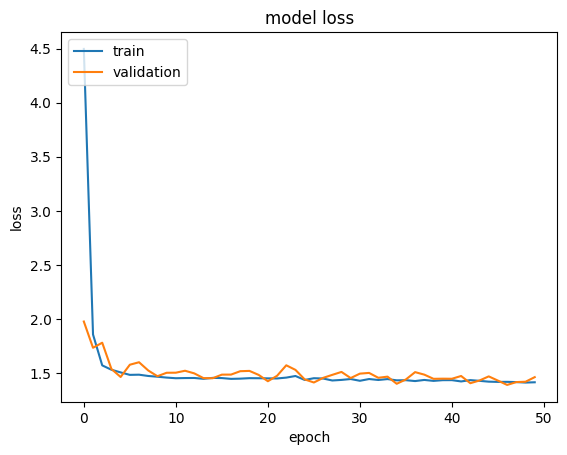

In [99]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [114]:
prediction=model.predict(X_test)
length=len(prediction)
#print(prediction)
y_label_prediction=np.argmax(prediction,axis=1)
print(y_label_prediction)

3/3 [==============================] - 0s 973us/step
[1 5 1 4 5 0 5 1 1 1 1 0 5 0 0 0 1 3 5 5 1 1 1 1 1 1 3 1 1 1 0 1 1 1 1 3 1
 1 0 1 1 1 1 0 0 4 5 1 1 1 1 5 5 1 1 1 1 1 1 1 0 1 3 3 1]


In [115]:
y_label_values=np.argmax(y_test_c,axis=1)
# print(y_test_c)
print(y_label_values)


[0 3 0 4 5 2 5 0 1 4 0 0 5 0 0 2 0 3 5 3 1 1 1 4 1 1 3 3 1 1 0 0 1 3 0 3 2
 2 0 0 1 2 0 0 5 5 5 0 0 0 3 5 5 1 1 1 0 1 1 1 1 0 4 1 0]


In [116]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_label_values, y_label_prediction)
print('Accuracy: %f' % accuracy)

Accuracy: 0.507692


In [117]:
# confusion matrix
matrix = confusion_matrix(y_label_values, y_label_prediction)
print(matrix)

[[ 6 15  0  0  0  0]
 [ 1 16  0  1  0  0]
 [ 2  3  0  0  0  0]
 [ 0  3  0  3  0  2]
 [ 0  2  0  1  1  0]
 [ 1  0  0  0  1  7]]
